In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from datetime import datetime 
from sklearn import metrics
import seaborn as sns
import pandas_profiling
from sklearn.model_selection import cross_val_score
import statsmodels.formula.api as smf
from sklearn.ensemble import RandomForestClassifier

In [3]:
df_train=pd.read_csv('train.csv')
df_features=pd.read_csv('features.csv')
df_stores=pd.read_csv('stores.csv')
df_test=pd.read_csv('test.csv')

In [4]:
df_train.head(3)

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False


In [5]:
df_stores.head(2)

,Store,Type,Size
0,1,A,151315
1,2,A,202307


In [6]:
df_features.head(2)

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True


In [7]:
df_test.head(3)

,Store,Dept,Date,IsHoliday
0,1,1,2012-11-02,False
1,1,1,2012-11-09,False
2,1,1,2012-11-16,False


In [8]:
df_train_merged= pd.merge(df_train, df_features)
df_train_merged= pd.merge(df_train_merged,df_stores)

In [9]:
df_train_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 421570 entries, 0 to 421569
Data columns (total 16 columns):
Store           421570 non-null int64
Dept            421570 non-null int64
Date            421570 non-null object
Weekly_Sales    421570 non-null float64
IsHoliday       421570 non-null bool
Temperature     421570 non-null float64
Fuel_Price      421570 non-null float64
MarkDown1       150681 non-null float64
MarkDown2       111248 non-null float64
MarkDown3       137091 non-null float64
MarkDown4       134967 non-null float64
MarkDown5       151432 non-null float64
CPI             421570 non-null float64
Unemployment    421570 non-null float64
Type            421570 non-null object
Size            421570 non-null int64
dtypes: bool(1), float64(10), int64(3), object(2)
memory usage: 51.9+ MB


In [10]:
df_test_merged= pd.merge(df_test, df_features)
df_test_merged= pd.merge(df_test_merged, df_stores)

In [11]:
df_test_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 115064 entries, 0 to 115063
Data columns (total 15 columns):
Store           115064 non-null int64
Dept            115064 non-null int64
Date            115064 non-null object
IsHoliday       115064 non-null bool
Temperature     115064 non-null float64
Fuel_Price      115064 non-null float64
MarkDown1       114915 non-null float64
MarkDown2       86437 non-null float64
MarkDown3       105235 non-null float64
MarkDown4       102176 non-null float64
MarkDown5       115064 non-null float64
CPI             76902 non-null float64
Unemployment    76902 non-null float64
Type            115064 non-null object
Size            115064 non-null int64
dtypes: bool(1), float64(9), int64(3), object(2)
memory usage: 13.3+ MB


In [12]:
df_train_merged['DateTimeObj'] = [datetime.strptime(x, '%Y-%m-%d') for x in list(df_train_merged['Date'])]
week_Num=df_train_merged.reset_index()

In [13]:
week_Num = [(x - df_train_merged['DateTimeObj'][0]) for x in list(df_train_merged['DateTimeObj'])]

In [14]:
df_train_merged['Week'] = [np.timedelta64(x, 'D').astype(int)/7 for x in week_Num]

In [15]:
df_test_merged['DateTimeObj'] = [datetime.strptime(x, '%Y-%m-%d') for x in list(df_test_merged['Date'])]
week_Num=df_test_merged.reset_index()

In [16]:
week_Num = [(x - df_test_merged['DateTimeObj'][0]) for x in list(df_test_merged['DateTimeObj'])]

In [17]:
df_test_merged['Week'] = [np.timedelta64(x, 'D').astype(int)/7 for x in week_Num]

In [18]:
df_train_merged['Date'] = pd.to_datetime(df_train_merged['Date'])
df_test_merged['Date'] = pd.to_datetime(df_test_merged['Date'])

In [19]:
# # Extract date features
# df_train_merged['Date_dayofweek'] =df_train_merged['Date'].dt.dayofweek
# df_train_merged['Date_month'] =df_train_merged['Date'].dt.month 
# df_train_merged['Date_year'] =df_train_merged['Date'].dt.year
# df_train_merged['Date_day'] =df_train_merged['Date'].dt.day 

# df_test_merged['Date_dayofweek'] =df_test_merged['Date'].dt.dayofweek
# df_test_merged['Date_month'] =df_test_merged['Date'].dt.month 
# df_test_merged['Date_year'] =df_test_merged['Date'].dt.year
# df_test_merged['Date_day'] =df_test_merged['Date'].dt.day 

In [ ]:
#df_train_merged.IsHoliday= np.where(df_train_merged.IsHoliday== True, 1, 0)

In [ ]:
#df_test_merged.IsHoliday= np.where(df_test_merged.IsHoliday== True, 1, 0)

In [20]:
#train
df_train_merged['Super_Bowl'] = np.where((df_train_merged['Date']==datetime(2010, 2, 12)) | (df_train_merged['Date']==datetime(2011, 2, 11)) | (df_train_merged['Date']==datetime(2012, 2, 10)) | (df_train_merged['Date']==datetime(2013, 2, 8)),1,0)
df_train_merged['Labour_Day'] = np.where((df_train_merged['Date']==datetime(2010, 9, 10)) | (df_train_merged['Date']==datetime(2011, 9, 9)) | (df_train_merged['Date']==datetime(2012, 9, 7)) | (df_train_merged['Date']==datetime(2013, 9, 6)),1,0)
df_train_merged['Thanksgiving'] = np.where((df_train_merged['Date']==datetime(2010, 11, 26)) | (df_train_merged['Date']==datetime(2011, 11, 25)) | (df_train_merged['Date']==datetime(2012, 11, 23)) | (df_train_merged['Date']==datetime(2013, 11, 29)),1,0)
df_train_merged['Christmas'] = np.where((df_train_merged['Date']==datetime(2010, 12, 31)) | (df_train_merged['Date']==datetime(2011, 12, 30)) | (df_train_merged['Date']==datetime(2012, 12, 28)) | (df_train_merged['Date']==datetime(2013, 12, 27)),1,0)



#test
df_test_merged['Super_Bowl'] = np.where((df_test_merged['Date']==datetime(2010, 2, 12)) | (df_test_merged['Date']==datetime(2011, 2, 11)) | (df_test_merged['Date']==datetime(2012, 2, 10)) | (df_test_merged['Date']==datetime(2013, 2, 8)),1,0)
df_test_merged['Labour_Day'] = np.where((df_test_merged['Date']==datetime(2010, 9, 10)) | (df_test_merged['Date']==datetime(2011, 9, 9)) | (df_test_merged['Date']==datetime(2012, 9, 7)) | (df_test_merged['Date']==datetime(2013, 9, 6)),1,0)
df_test_merged['Thanksgiving'] = np.where((df_test_merged['Date']==datetime(2010, 11, 26)) | (df_test_merged['Date']==datetime(2011, 11, 25)) | (df_test_merged['Date']==datetime(2012, 11, 23)) | (df_test_merged['Date']==datetime(2013, 11, 29)),1,0)
df_test_merged['Christmas'] = np.where((df_test_merged['Date']==datetime(2010, 12, 31)) | (df_test_merged['Date']==datetime(2011, 12, 30)) | (df_test_merged['Date']==datetime(2012, 12, 28)) | (df_test_merged['Date']==datetime(2013, 12, 27)),1,0)


In [21]:
# change IsHoliday  with new values
df_train_merged['IsHoliday']=df_train_merged['IsHoliday']|df_train_merged['Super_Bowl']|df_train_merged['Labour_Day']|df_train_merged['Thanksgiving']|df_train_merged['Christmas']
df_test_merged['IsHoliday']=df_test_merged['IsHoliday']|df_test_merged['Super_Bowl']|df_test_merged['Labour_Day']|df_test_merged['Thanksgiving']|df_test_merged['Christmas']

In [22]:
df_train_merged.drop(columns= ['Super_Bowl','Labour_Day','Thanksgiving','Christmas'], inplace= True)
df_test_merged.drop(columns= ['Super_Bowl','Labour_Day','Thanksgiving','Christmas'], inplace= True)

In [ ]:
df_train_merged.info()

In [24]:
#df_train_merged_2= df_train_merged.copy()

In [23]:
#df_test_merged_2= df_test_merged.copy()

In [25]:
df_train_merged.drop(columns=['Date_dayofweek' ,'Date_month', 'Date_year', 'Date_day'], inplace=True)

In [26]:
df_test_merged.drop(columns=['Date_dayofweek' ,'Date_month', 'Date_year', 'Date_day'], inplace=True)

In [28]:
df_train_merged.drop(columns= ['Date','DateTimeObj'], inplace=True)

In [29]:
df_test_merged.drop(columns= ['Date','DateTimeObj'], inplace=True)

In [31]:
# Creating Data audit Report
def var_summary(x):
    return pd.Series([x.count(), x.isnull().sum(), x.sum(), x.mean(), x.median(),  x.std(), x.var(), x.std()/x.mean(), x.min(), x.dropna().quantile(0.01), x.dropna().quantile(0.05),x.dropna().quantile(0.10),x.dropna().quantile(0.25),x.dropna().quantile(0.50),x.dropna().quantile(0.75), x.dropna().quantile(0.90),x.dropna().quantile(0.95), x.dropna().quantile(0.99),x.max()], 
                  index=['N', 'NMISS', 'SUM', 'MEAN','MEDIAN', 'STD', 'VAR', 'CV','MIN', 'P1' , 'P5' ,'P10' ,'P25' ,'P50' ,'P75' ,'P90' ,'P95' ,'P99' ,'MAX'])

In [32]:
def cat_summary(x):
    return pd.Series([x.count(), x.isnull().sum(), x.value_counts()], 
                  index=['N', 'NMISS', 'ColumnsNames'])

In [37]:
numeric_var_train=[key for key in dict(df_train_merged.dtypes) if dict(df_train_merged.dtypes)[key] in ['float64', 'int64', 'float32', 'int32']]
cat_var_train=[key for key in dict(df_train_merged.dtypes) if dict(df_train_merged.dtypes)[key] in ['object','O', 'bool']]
# Train Numerical Data and categorical data
train_num=df_train_merged[numeric_var_train]
train_cat=df_train_merged[cat_var_train]

In [33]:
numeric_var_test=[key for key in dict(df_test_merged.dtypes) if dict(df_test_merged.dtypes)[key] in ['float64', 'int64', 'float32', 'int32']]

# Test Numerical Data and categorical data
test_num=df_test_merged[numeric_var_test]



In [34]:
cat_var_test=[key for key in dict(df_test_merged.dtypes) if dict(df_test_merged.dtypes)[key] in ['object','O', 'bool']]
test_cat=df_test_merged[cat_var_test]

In [38]:
num_summary=train_num.apply(lambda x: var_summary(x)).T

num_summary

,N,NMISS,SUM,MEAN,MEDIAN,STD,VAR,CV,MIN,P1,P5,P10,P25,P50,P75,P90,P95,P99,MAX
Store,421570.0,0.0,9.359084e+06,22.200546,22.00000,12.785297,1.634638e+02,0.575900,1.000,1.000000,3.000000,5.000000,11.000000,22.00000,33.000000,40.000000,43.000000,45.000000,45.000000
Dept,421570.0,0.0,1.865882e+07,44.260317,37.00000,30.492054,9.297654e+02,0.688925,1.000,1.000000,4.000000,7.000000,18.000000,37.00000,74.000000,92.000000,95.000000,98.000000,99.000000
Weekly_Sales,421570.0,0.0,6.737219e+09,15981.258123,7612.03000,22711.183519,5.157979e+08,1.421114,-4988.940,5.000000,59.974500,291.097000,2079.650000,7612.03000,20205.852500,42845.673000,61201.951000,106479.586000,693099.360000
Temperature,421570.0,0.0,2.533217e+07,60.090059,62.09000,18.447931,3.403262e+02,0.307005,-2.060,18.300000,27.310000,33.980000,46.680000,62.09000,74.280000,83.580000,87.270000,92.810000,100.140000
Fuel_Price,421570.0,0.0,1.416908e+06,3.361027,3.45200,0.458515,2.102356e-01,0.136421,2.472,2.565000,2.653000,2.720000,2.933000,3.45200,3.738000,3.917000,4.029000,4.202000,4.468000
MarkDown1,150681.0,270889.0,1.091898e+09,7246.420196,5347.45000,8291.221345,6.874435e+07,1.144182,0.270,17.760000,149.190000,375.200000,2240.270000,5347.45000,9210.900000,15282.470000,21801.350000,41524.030000,88646.760000
MarkDown2,111248.0,310322.0,3.709708e+08,3334.628621,192.00000,9475.357325,8.978240e+07,2.841503,-265.760,-0.990000,1.950000,6.980000,41.600000,192.00000,1926.940000,8549.740000,16497.470000,50366.600000,104519.540000
MarkDown3,137091.0,284479.0,1.973317e+08,1439.421384,24.60000,9623.078290,9.260364e+07,6.685380,-29.100,0.060000,0.650000,1.650000,5.080000,24.60000,103.990000,400.090000,1059.900000,63143.290000,141630.610000
MarkDown4,134967.0,286603.0,4.566161e+08,3383.168256,1481.31000,6292.384031,3.959410e+07,1.859909,0.220,3.970000,28.760000,108.710000,504.220000,1481.31000,3595.040000,7871.420000,12645.960000,35785.260000,67474.850000
MarkDown5,151432.0,270138.0,7.009750e+08,4628.975079,3359.45000,5962.887455,3.555603e+07,1.288166,135.160,351.970000,715.520000,1070.830000,1878.440000,3359.45000,5563.800000,8337.700000,11269.240000,27754.230000,108519.280000


In [154]:
num_summary.to_csv('num_summary.csv')

In [39]:
cat_summary=train_cat.apply(lambda x: cat_summary(x)).T
cat_summary

,N,NMISS,ColumnsNames
IsHoliday,421570,0,False 391909 True 29661 Name: IsHolida...
Type,421570,0,A 215478 B 163495 C 42597 Name: Type...


In [36]:
num_summary_test= test_num.apply(lambda x: var_summary(x)).T
num_summary_test

,N,NMISS,SUM,MEAN,MEDIAN,STD,VAR,CV,MIN,P1,P5,P10,P25,P50,P75,P90,P95,P99,MAX
Store,115064.0,0.0,2.558817e+06,22.238207,22.000000,12.809930,1.640943e+02,0.576032,1.000000,1.000000,3.0000,5.000000,11.000000,22.000000,33.000000,40.000000,43.000000,45.000000,45.000000
Dept,115064.0,0.0,5.101883e+06,44.339524,37.000000,30.656410,9.398155e+02,0.691401,1.000000,1.000000,4.0000,7.000000,18.000000,37.000000,74.000000,92.000000,95.000000,98.000000,99.000000
Temperature,115064.0,0.0,6.206760e+06,53.941804,54.470000,18.724153,3.505939e+02,0.347118,-7.290000,11.440000,23.9800,29.970000,39.820000,54.470000,67.350000,79.480000,83.820000,92.140000,101.950000
Fuel_Price,115064.0,0.0,4.121070e+05,3.581546,3.606000,0.239442,5.733244e-02,0.066854,2.872000,2.957000,3.1610,3.227000,3.431000,3.606000,3.766000,3.866000,3.951000,4.079000,4.125000
MarkDown1,114915.0,149.0,8.836063e+08,7689.216439,4842.290000,10698.760716,1.144635e+08,1.391398,-2781.450000,20.840000,189.4900,457.660000,1966.460000,4842.290000,9439.140000,15325.040000,23140.880000,65757.570000,103184.980000
MarkDown2,86437.0,28627.0,3.227602e+08,3734.051729,742.590000,8323.495014,6.928057e+07,2.229079,-35.740000,0.020000,6.1400,25.770000,180.350000,742.590000,2735.670000,9277.290000,22671.670000,42920.210000,71074.170000
MarkDown3,105235.0,9829.0,2.528890e+08,2403.088666,78.260000,13767.939313,1.895562e+08,5.729268,-179.260000,0.150000,1.1800,3.100000,15.100000,78.260000,272.580000,698.930000,2361.570000,86476.660000,149483.310000
MarkDown4,102176.0,12888.0,3.429250e+08,3356.219071,840.940000,7570.501545,5.731249e+07,2.255664,0.220000,2.610000,16.9600,37.360000,155.460000,840.940000,3096.920000,7674.410000,14191.010000,44739.280000,65344.640000
MarkDown5,115064.0,0.0,4.513594e+08,3922.681189,2390.430000,19445.150745,3.781139e+08,4.957107,-185.170000,269.300000,540.8900,770.883000,1309.300000,2390.430000,4227.270000,6966.340000,9316.710000,18599.300000,771448.100000
CPI,76902.0,38162.0,1.360868e+07,176.961347,192.304445,41.239967,1.700735e+03,0.233045,131.236226,131.279355,131.4784,132.030871,138.402033,192.304445,223.244532,225.898059,227.784753,228.729864,228.976456


In [35]:
cat_summary_test= test_cat.apply(lambda x: cat_summary(x)).T
cat_summary_test

,N,NMISS,ColumnsNames
IsHoliday,115064,0,False 106136 True 8928 Name: IsHolida...
Type,115064,0,"A 58713 B 44500 C 11851 Name: Type, d..."


In [ ]:
### correlation matrix and heat map

In [40]:
train_corr=pd.DataFrame(df_train_merged.corr())
train_corr.head()

,Store,Dept,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Size,Week
Store,1.000000,0.024004,-0.085195,-0.000548,-0.050097,0.065290,-0.119588,-0.035173,-0.031556,-0.009941,-0.026634,-0.211088,0.208552,-0.182881,0.003362
Dept,0.024004,1.000000,0.148032,0.000916,0.004437,0.003572,-0.002426,0.000290,0.001784,0.004257,0.000109,-0.007477,0.007837,-0.002966,0.004054
Weekly_Sales,-0.085195,0.148032,1.000000,0.012774,-0.002312,-0.000120,0.085251,0.024130,0.060385,0.045414,0.090362,-0.020921,-0.025864,0.243828,-0.000663
IsHoliday,-0.000548,0.000916,0.012774,1.000000,-0.155949,-0.078281,-0.035586,0.334818,0.427960,-0.000562,-0.053719,-0.001944,0.010460,0.000593,-0.013017
Temperature,-0.050097,0.004437,-0.002312,-0.155949,1.000000,0.143859,-0.040594,-0.323927,-0.096880,-0.063947,-0.017544,0.182112,0.096730,-0.058313,0.147064


In [155]:
train_corr.to_csv('train_corr.csv')

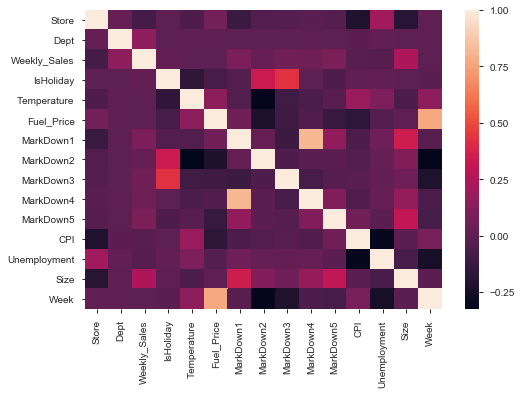

In [41]:
sns.heatmap(df_train_merged.corr())

In [42]:
test_corr=pd.DataFrame(df_test_merged.corr())
test_corr.head()

,Store,Dept,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Size,Week
Store,1.000000,0.019627,-0.001166,-0.043495,0.153425,-0.091707,-0.041370,-0.025177,0.010331,0.010419,-0.214872,0.250321,-0.186845,0.001900
Dept,0.019627,1.000000,0.001249,0.003970,0.000554,-0.002353,0.001292,0.000247,0.002510,0.000776,-0.006336,0.004087,0.001502,0.000485
IsHoliday,-0.001166,0.001249,1.000000,-0.187428,-0.126443,0.355257,0.265402,0.496062,0.289700,-0.019386,-0.001475,0.010288,-0.000443,-0.273623
Temperature,-0.043495,0.003970,-0.187428,1.000000,0.073938,-0.168899,-0.324280,-0.049771,-0.059583,0.003937,0.280861,0.022136,-0.061256,0.640836
Fuel_Price,0.153425,0.000554,-0.126443,0.073938,1.000000,0.083320,-0.161963,-0.005827,0.034199,0.012722,-0.465721,0.417126,0.055088,0.247619


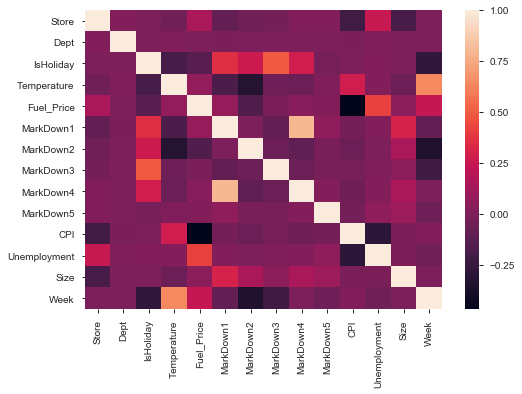

In [43]:
sns.heatmap(df_test_merged.corr())

In [156]:
## MArkdown 4 is highly correlated to markdown 1
## week is correlated with markdown2 and is holiday
### cpi with fuel_price 
## unemployment and cpi are correlated

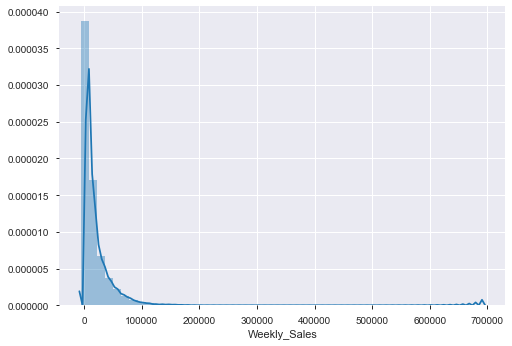

In [44]:
sns.distplot(df_train_merged.Weekly_Sales)

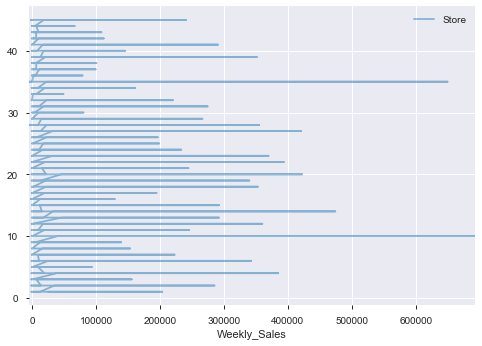

In [45]:
# store size and sales
df_train_merged.plot(kind= 'line', x= 'Weekly_Sales', y= 'Store', alpha = 0.5)

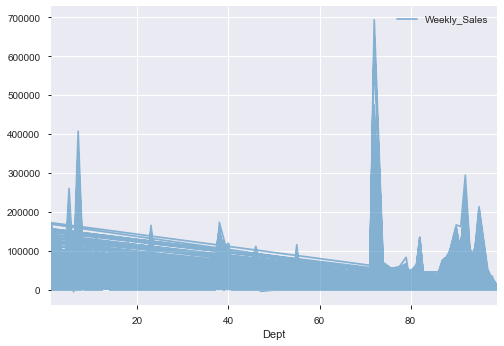

In [46]:
# sales vs department
df_train_merged.plot(kind='line', x='Dept', y='Weekly_Sales', alpha=0.5,fig=(5,6))

In [ ]:
#df_train_merged.info()

In [ ]:
#df_test_merged.info()

In [ ]:
df_train_merged.describe().T

In [ ]:
df_test_merged.describe().T

In [ ]:
#pandas_profiling.ProfileReport(df_train_merged)

In [ ]:
#pandas_profiling.ProfileReport(df_test_merged)


### Missing Value Treatment

In [47]:
#Handling missings
def Missing_imputation(x):
    x = x.fillna(x.median())
    return x

In [48]:
train_num=train_num.apply(Missing_imputation)
test_num=test_num.apply(Missing_imputation)

In [157]:
#print(df_train_merged_2.isnull().sum())


In [158]:

#print(df_test_merged_2.isnull().sum())

In [159]:
# df_test_merged_2['CPI']=df_test_merged_2.groupby(['Dept'])['CPI'].transform(lambda x: x.fillna(x.mean()))
# df_test_merged_2['Unemployment']=df_test_merged_2.groupby(['Dept'])['Unemployment'].transform(lambda x: x.fillna(x.mean()))

In [160]:
# df_train_merged_2=df_train_merged_2.fillna(0)
# df_test_merged_2=df_test_merged_2.fillna(0)

In [161]:
#print(df_train_merged_2.isnull().sum())

In [162]:
#print(df_test_merged_2.isnull().sum())

### Outlier Treatment

In [49]:
#Handling Outliers
def outlier_capping(x):
    x = x.clip(upper=x.quantile(0.99))
    x = x.clip(lower=x.quantile(0.01))
    return x


In [50]:
train_num=train_num.apply(outlier_capping)
test_num=test_num.apply(outlier_capping)

In [163]:
#df_train_merged_2.Weekly_Sales=np.where(df_train_merged_2.Weekly_Sales>100000, 100000,df_train_merged_2.Weekly_Sales)

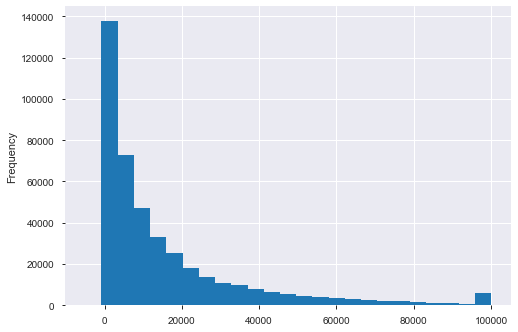

In [59]:
df_train_merged_2.Weekly_Sales.plot.hist(bins=25)

In [67]:
#df_train_merged_2.loc[df_train_merged_2.Type== 'A']= 1

In [68]:
#df_train_merged_2.loc[df_train_merged_2.Type== 'B']= 2

In [69]:
#df_train_merged_2.loc[df_train_merged_2.Type== 'C']= 3

In [164]:
#df_test_merged_2.loc[df_test_merged_2.Type== 'A']= 1

In [71]:
#df_test_merged_2.loc[df_test_merged_2.Type== 'B']= 2

In [72]:
#df_test_merged_2.loc[df_test_merged_2.Type== 'C']= 3

### Dummy Creation

In [74]:
# An utility function to create dummy variable
def create_dummies( df, colname ):
    col_dummies = pd.get_dummies(df[colname], prefix=colname, drop_first=True)
    df = pd.concat([df, col_dummies], axis=1)
    df.drop( colname, axis = 1, inplace = True )
    return df

In [75]:
for c_feature in ['IsHoliday', 'Type']:
    train_cat.loc[:,c_feature] = train_cat[c_feature].astype('category')
    train_cat = create_dummies(train_cat , c_feature )    

C:\Users\Krn\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [76]:
train_cat.head()

,IsHoliday_True,Type_B,Type_C
0,0,0,0
1,0,0,0
2,0,0,0
3,0,0,0
4,0,0,0


In [77]:
for c_feature in ['IsHoliday', 'Type']:
    test_cat.loc[:,c_feature] = test_cat[c_feature].astype('category')
    test_cat = create_dummies(test_cat , c_feature )  

In [78]:
train = pd.concat([train_num, train_cat], axis=1)
train.head()

,Store,Dept,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Size,Week,IsHoliday_True,Type_B,Type_C
0,1,1,24924.50,42.31,2.572,5347.45,192.0,24.6,1481.31,3359.45,211.096358,8.106,151315,1.0,0,0,0
1,1,2,50605.27,42.31,2.572,5347.45,192.0,24.6,1481.31,3359.45,211.096358,8.106,151315,1.0,0,0,0
2,1,3,13740.12,42.31,2.572,5347.45,192.0,24.6,1481.31,3359.45,211.096358,8.106,151315,1.0,0,0,0
3,1,4,39954.04,42.31,2.572,5347.45,192.0,24.6,1481.31,3359.45,211.096358,8.106,151315,1.0,0,0,0
4,1,5,32229.38,42.31,2.572,5347.45,192.0,24.6,1481.31,3359.45,211.096358,8.106,151315,1.0,0,0,0


In [79]:
test = pd.concat([test_num, test_cat], axis=1)
test.head()

,Store,Dept,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Size,Week,IsHoliday_True,Type_B,Type_C
0,1,1,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573,151315,0.0,0,0,0
1,1,2,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573,151315,0.0,0,0,0
2,1,3,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573,151315,0.0,0,0,0
3,1,4,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573,151315,0.0,0,0,0
4,1,5,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573,151315,0.0,0,0,0


In [165]:
train_corr2= train.corr()
train_corr2.to_csv('train_corr2.csv')

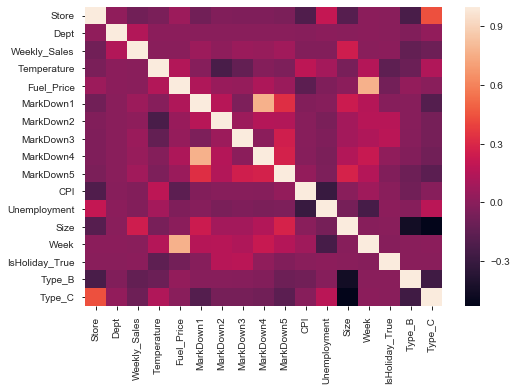

In [80]:
sns.heatmap(train.corr())

###  Model Buildings

####  Linear Regression model basic phase 1

In [108]:
lm=smf.ols('Weekly_Sales~CPI+Dept+Fuel_Price+IsHoliday_True+MarkDown1+MarkDown2+MarkDown3+MarkDown4+MarkDown5+Size+Store+Temperature+Type_B+Type_C+Unemployment+Week', train).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:           Weekly_Sales   R-squared:                       0.093
Model:                            OLS   Adj. R-squared:                  0.093
Method:                 Least Squares   F-statistic:                     2706.
Date:                Tue, 18 Feb 2020   Prob (F-statistic):               0.00
Time:                        00:06:28   Log-Likelihood:            -4.7687e+06
No. Observations:              421570   AIC:                         9.538e+06
Df Residuals:                  421553   BIC:                         9.538e+06
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       5076.8312    455.763     11.

In [109]:
lm=smf.ols('Weekly_Sales~CPI+Dept+IsHoliday_True+MarkDown3+MarkDown4+MarkDown5+Size+Store+Type_B+Type_C+Unemployment+Week', train).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:           Weekly_Sales   R-squared:                       0.093
Model:                            OLS   Adj. R-squared:                  0.093
Method:                 Least Squares   F-statistic:                     3593.
Date:                Tue, 18 Feb 2020   Prob (F-statistic):               0.00
Time:                        00:06:32   Log-Likelihood:            -4.7688e+06
No. Observations:              421570   AIC:                         9.538e+06
Df Residuals:                  421557   BIC:                         9.538e+06
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       6256.4729    311.187     20.

In [110]:
train_new=train[['Weekly_Sales','CPI','Dept','IsHoliday_True','MarkDown3','MarkDown4','MarkDown5','Size','Store','Type_B','Type_C','Unemployment','Week']]
test_new=test[['CPI','Dept','IsHoliday_True','MarkDown3','MarkDown4','MarkDown5','Size','Store','Type_B','Type_C','Unemployment','Week']]

In [111]:
train_X=train_new[train_new.columns.difference(['Weekly_Sales'])]
train_y=train_new['Weekly_Sales']
test_X=test_new

####  Decision Tree

In [112]:
from sklearn.tree import DecisionTreeRegressor  
from sklearn.model_selection import cross_val_predict

In [113]:
regressor_dt = DecisionTreeRegressor(max_depth=5,random_state=123)  
regressor_dt.fit(train_X, train_y) 

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=5,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=123, splitter='best')

In [114]:
predict_train=regressor_dt.predict(train_X)

In [115]:
print('Mean Absolute Error:', metrics.mean_absolute_error(train_y, predict_train))  
print('Mean Squared Error:', metrics.mean_squared_error(train_y, predict_train))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(train_y, predict_train)))

Mean Absolute Error: 9138.939956766475
Mean Squared Error: 192651662.64169046
Root Mean Squared Error: 13879.901391641457


In [116]:
print("R-squared for Train:",regressor_dt.score(train_X, train_y))

R-squared for Train: 0.5539198835016881


In [117]:
y_pred = regressor_dt.predict(test_X) 
y_pred

array([23138.33311422, 53757.24167917, 21729.79220581, ...,
       41301.03159852,  4091.68335404,   317.57510846])

In [118]:
### Tunning dt
# list of values to try
max_depth_range = range(5, 15)

# list to store the average RMSE for each value of max_depth
RMSE_Scores = []
MSE_Scores = []

# use LOOCV with each value of max_depth
for depth in max_depth_range:
    treereg = DecisionTreeRegressor(max_depth=depth, random_state=345)
    
    MSE_scores = cross_val_score(treereg, train_X, train_y, cv=14, scoring='neg_mean_squared_error')
    
    RMSE_Scores.append(np.mean(np.sqrt(-MSE_scores)))
    MSE_Scores.append(MSE_scores)

In [119]:
print (RMSE_Scores)

[14390.142518186332, 12281.79777485064, 11402.981019839524, 11321.753227475765, 11221.771421202695, 11058.338719909714, 11136.982427493165, 11254.22506436281, 11193.378704910578, 11265.807375492697]


Text(0, 0.5, 'RMSE (lower is better)')

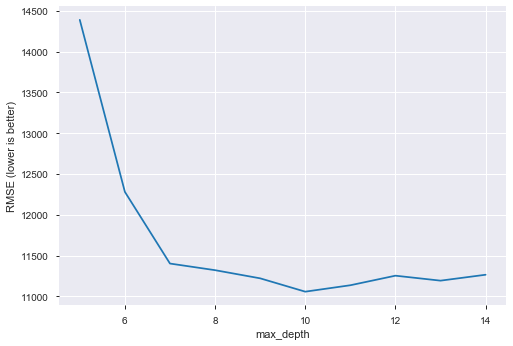

In [120]:
# plot max_depth (x-axis) versus RMSE (y-axis)
plt.plot(max_depth_range, RMSE_Scores)
plt.xlabel('max_depth')
plt.ylabel('RMSE (lower is better)')

####  Final Dt

In [121]:
# max_depth=10 was best, so fit a tree using that parameter
treereg = DecisionTreeRegressor(max_depth=10, random_state=345)
treereg.fit(train_X, train_y)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=10,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=345, splitter='best')

In [122]:
treereg.feature_importances_

array([1.36472039e-02, 7.32045432e-01, 2.48501122e-04, 1.43666637e-03,
       5.97878177e-05, 1.83387394e-04, 1.89630860e-01, 4.24738551e-02,
       1.34983479e-02, 2.13568120e-03, 3.66908018e-03, 9.71196359e-04])

In [123]:
# "Gini importance" of each feature: the (normalized) total reduction of error brought by that feature
pd.DataFrame({'feature':train_new.columns.difference(['Weekly_Sales']), 'importance':treereg.feature_importances_})

,feature,importance
0,CPI,0.013647
1,Dept,0.732045
2,IsHoliday_True,0.000249
3,MarkDown3,0.001437
4,MarkDown4,0.000060
5,MarkDown5,0.000183
6,Size,0.189631
7,Store,0.042474
8,Type_B,0.013498
9,Type_C,0.002136


In [ ]:
# predictions 

In [124]:
predict_train_dt=treereg.predict(train_X)

In [125]:
dtree=pd.DataFrame({'Actual':train_y, 'Predicted':predict_train_dt ,'Week':train_new.Week})  
dtree

,Actual,Predicted,Week
0,24924.50,18739.563214,1.0
1,50605.27,40915.956084,1.0
2,13740.12,13901.344527,1.0
3,39954.04,24377.375283,1.0
4,32229.38,24377.375283,1.0
5,5749.03,4865.837369,1.0
6,21084.08,28146.466903,1.0
7,40129.01,28146.466903,1.0
8,16930.99,26773.882383,1.0
9,30721.50,26773.882383,1.0


In [126]:
mean_week=dtree.groupby('Week').apply(lambda x:np.mean(x))

In [127]:
mean_week

,Actual,Predicted,Week
Week,,,
1.0,16164.365927,15772.901781,1.0
2.0,15921.263693,15644.339545,2.0
3.0,14655.912265,15709.316531,3.0
4.0,15598.429559,15748.198235,4.0
5.0,15268.626872,15650.437881,5.0
6.0,15089.015314,15682.760614,6.0
7.0,14839.466896,15637.199014,7.0
8.0,16803.913539,15702.150295,8.0
9.0,15851.692892,15679.182821,9.0


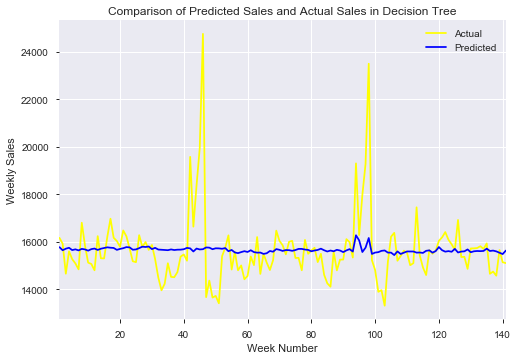

In [128]:
mean_week.plot(kind='line',x='Week',y='Actual', color='yellow',ax=plt.gca())
mean_week.plot(kind='line',x='Week',y='Predicted', color='blue', ax=plt.gca())
plt.xlabel('Week Number')
plt.ylabel('Weekly Sales')
plt.title('Comparison of Predicted Sales and Actual Sales in Decision Tree')
plt.show()

In [129]:
print('Mean Absolute Error:', metrics.mean_absolute_error(train_y, predict_train_dt))  
print('Mean Squared Error:', metrics.mean_squared_error(train_y, predict_train_dt))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(train_y, predict_train_dt)))

Mean Absolute Error: 4201.3310774762
Mean Squared Error: 55288178.79622714
Root Mean Squared Error: 7435.602113899529


In [130]:
print("R-squared for Train:",treereg.score(train_X, train_y))

R-squared for Train: 0.8719816019222699


In [131]:
y_pred = treereg.predict(test_X) 
pd.DataFrame(y_pred)

,0
0,18739.563214
1,40915.956084
2,13901.344527
3,24377.375283
4,24377.375283
5,4865.837369
6,28146.466903
7,28146.466903
8,26773.882383
9,26773.882383


In [132]:
DT_output=pd.read_csv('test.csv')
DT_output['Weekly_Sales']=pd.DataFrame(y_pred)
DT_output.to_csv('DT_output.csv')

####  Random Forest

In [133]:
from sklearn.ensemble import RandomForestRegressor

In [134]:
rfr = RandomForestRegressor(max_depth=5,n_estimators=20, random_state=0)  
rfr.fit(train_X, train_y)  
pred = rfr.predict(train_X) 

In [135]:
print('Mean Absolute Error:', metrics.mean_absolute_error(train_y, pred))  
print('Mean Squared Error:', metrics.mean_squared_error(train_y, pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(train_y, pred)))

Mean Absolute Error: 9113.104584940842
Mean Squared Error: 191878732.40157518
Root Mean Squared Error: 13852.029901843815


In [136]:
print("R-squared for Train:",rfr.score(train_X, train_y))

R-squared for Train: 0.5557095841812871


In [137]:
y_pred = rfr.predict(test_X) 
y_pred

array([23205.52408794, 54410.02563481, 21985.14872798, ...,
       41434.74957914,  4102.86770649,   319.39102646])

#####  Tuning rf

In [138]:
from sklearn.model_selection import GridSearchCV

In [139]:
param_grid={'max_depth': range(8,15),
            'n_estimators': (10, 50)}


In [140]:
# Perform Grid-Search
gsc = GridSearchCV(estimator=RandomForestRegressor(),param_grid=param_grid,cv=5, verbose=0, n_jobs=-1)
    
grid_result = gsc.fit(train_X, train_y)

In [143]:
grid_result.best_score_

0.725539616869469

In [145]:
grid_result.best_params_

{'max_depth': 14, 'n_estimators': 50}

####  Final rf

In [146]:
rfr = RandomForestRegressor(max_depth=14,n_estimators=50, random_state=0)  
rfr.fit(train_X, train_y)  
pred = rfr.predict(train_X) 

In [148]:
rf=pd.DataFrame({'Actual':train_y, 'Predicted':pred, 'Week': train_new.Week})  
rf

,Actual,Predicted,Week
0,24924.50,30107.462576,1.0
1,50605.27,45920.004398,1.0
2,13740.12,12584.827112,1.0
3,39954.04,32428.146294,1.0
4,32229.38,26626.014519,1.0
5,5749.03,5254.901814,1.0
6,21084.08,22453.436604,1.0
7,40129.01,31830.856864,1.0
8,16930.99,28177.119626,1.0
9,30721.50,29151.894527,1.0


In [149]:
week_mean=rf.groupby('Week').apply(lambda x:np.mean(x))
week_mean

,Actual,Predicted,Week
Week,,,
1.0,16164.365927,15849.408612,1.0
2.0,15921.263693,15561.946049,2.0
3.0,14655.912265,15490.213292,3.0
4.0,15598.429559,15539.926334,4.0
5.0,15268.626872,15392.759501,5.0
6.0,15089.015314,15400.507224,6.0
7.0,14839.466896,15373.216967,7.0
8.0,16803.913539,15899.318132,8.0
9.0,15851.692892,15813.785133,9.0


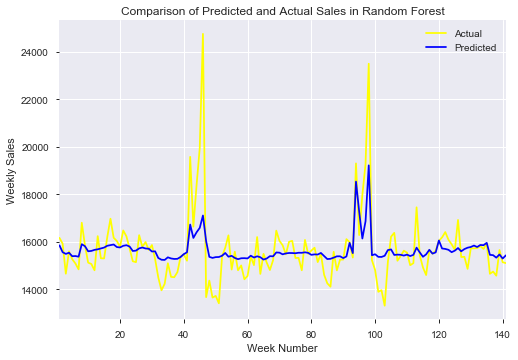

In [150]:
week_mean.plot(kind='line',x='Week',y='Actual', color='yellow',ax=plt.gca())
week_mean.plot(kind='line',x='Week',y='Predicted', color='blue', ax=plt.gca())
plt.xlabel('Week Number')
plt.ylabel('Weekly Sales')
plt.title('Comparison of Predicted and Actual Sales in Random Forest')
plt.show()

In [151]:
print("R-squared for Train:",rfr.score(train_X, train_y))

R-squared for Train: 0.953563687425042


In [152]:
y_pred = rfr.predict(test_X) 
pd.DataFrame(y_pred)

,0
0,30951.145626
1,46949.913452
2,12358.795353
3,32377.106404
4,26563.800848
5,4233.536724
6,19972.679354
7,30722.100200
8,29716.250124
9,30217.746826


In [153]:
RF_output=pd.read_csv('test.csv')
RF_output['Weekly_Sales']=pd.DataFrame(y_pred)
RF_output.to_csv('RF_output.csv')